In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

In [2]:
# Load data
data = pd.read_csv('country_wise_latest.csv')

In [3]:
# Extract relevant columns
data_cluster = data[['Confirmed', 'Deaths']]

In [4]:
# Handle missing values (if any)
data_cluster = data_cluster.dropna()


In [5]:
# Normalize the data
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data_cluster)

In [6]:
# Apply Gaussian Mixture Model (GMM)
gmm = GaussianMixture(n_components=3, random_state=42)  # Set n_components as needed
gmm.fit(data_normalized)
labels = gmm.predict(data_normalized)

In [7]:
# Tâm cụm và độ lệch chuẩn của GMM
centers = gmm.means_
covariances = gmm.covariances_

num_noise_points = 100 #số lượng điểm nhiễunhiễu
noise_scale = 0.3 #phân phối chuẩnchuẩn

In [8]:
# Sinh các điểm nhiễu quanh từng cụm
noise_points = []
for center, cov in zip(centers, covariances):
    noise = np.random.multivariate_normal(mean=center, cov=cov * noise_scale, size=num_noise_points // len(centers))
    noise_points.append(noise)

In [9]:
# Kết hợp các điểm nhiễu lại
noise_points = np.vstack(noise_points)


In [10]:
# Predict cluster labels
clusters = gmm.predict(data_normalized)
probabilities = gmm.predict_proba(data_normalized)

In [11]:
# Add cluster and evidence to the original data
data['Cluster'] = clusters
data['Evidence'] = probabilities.max(axis=1)

In [12]:
# Show input data
print("Input Data:")
print(data_cluster.head())

Input Data:
   Confirmed  Deaths
0      36263    1269
1       4880     144
2      27973    1163
3        907      52
4        950      41


In [13]:
# Show output data with clusters
print("\nOutput Data with Clusters:")
print(data[['Country/Region', 'Confirmed', 'Deaths', 'Cluster','Evidence']].head())


Output Data with Clusters:
  Country/Region  Confirmed  Deaths  Cluster  Evidence
0    Afghanistan      36263    1269        0       1.0
1        Albania       4880     144        0       1.0
2        Algeria      27973    1163        0       1.0
3        Andorra        907      52        0       1.0
4         Angola        950      41        0       1.0


In [14]:
# Show cluster statistics
print("\nCluster Statistics:")
for cluster_id in range(gmm.n_components):
    cluster_data = data[data['Cluster'] == cluster_id]
    print(f"Cluster {cluster_id}:")
    print(cluster_data[['Confirmed', 'Deaths']].describe())


Cluster Statistics:
Cluster 0:
          Confirmed        Deaths
count  1.850000e+02    185.000000
mean   5.269109e+04   2261.659459
std    1.455289e+05   6890.333484
min    1.000000e+01      0.000000
25%    1.100000e+03     18.000000
50%    4.881000e+03     99.000000
75%    3.948200e+04    713.000000
max    1.480073e+06  45844.000000
Cluster 1:
       Confirmed    Deaths
count        1.0       1.0
mean   4290259.0  148011.0
std          NaN       NaN
min    4290259.0  148011.0
25%    4290259.0  148011.0
50%    4290259.0  148011.0
75%    4290259.0  148011.0
max    4290259.0  148011.0
Cluster 2:
       Confirmed   Deaths
count        1.0      1.0
mean   2442375.0  87618.0
std          NaN      NaN
min    2442375.0  87618.0
25%    2442375.0  87618.0
50%    2442375.0  87618.0
75%    2442375.0  87618.0
max    2442375.0  87618.0


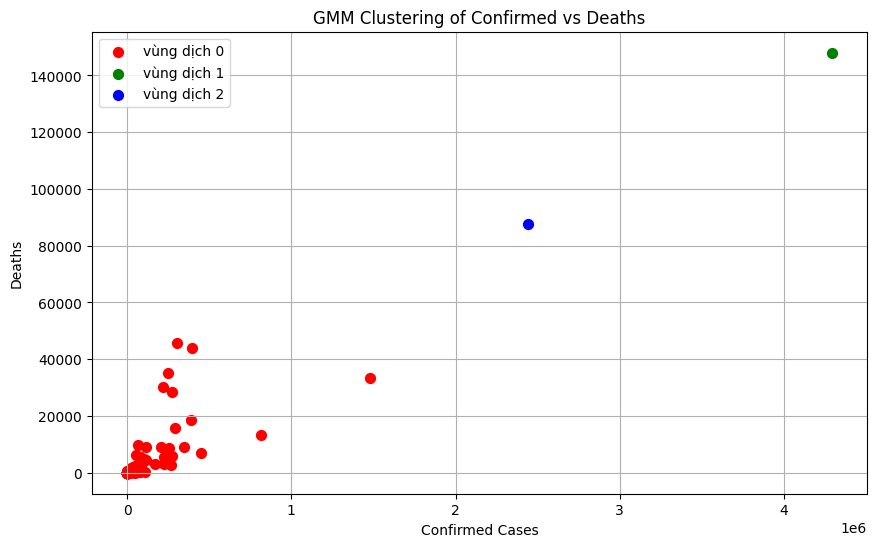

In [ ]:
# Plot the clustering result
plt.figure(figsize=(10, 6))
colors = ['red', 'green', 'blue']
for cluster_id in range(gmm.n_components):
    cluster_data = data_cluster[clusters == cluster_id]
plt.scatter(cluster_data['Confirmed'], cluster_data['Deaths'], 
                s=50, c=colors[cluster_id], label=f'vùng dịch {cluster_id}')

plt.title('GMM Clustering of Confirmed vs Deaths')
plt.xlabel('Confirmed Cases')
plt.ylabel('Deaths')
plt.legend()
plt.grid()
plt.show()


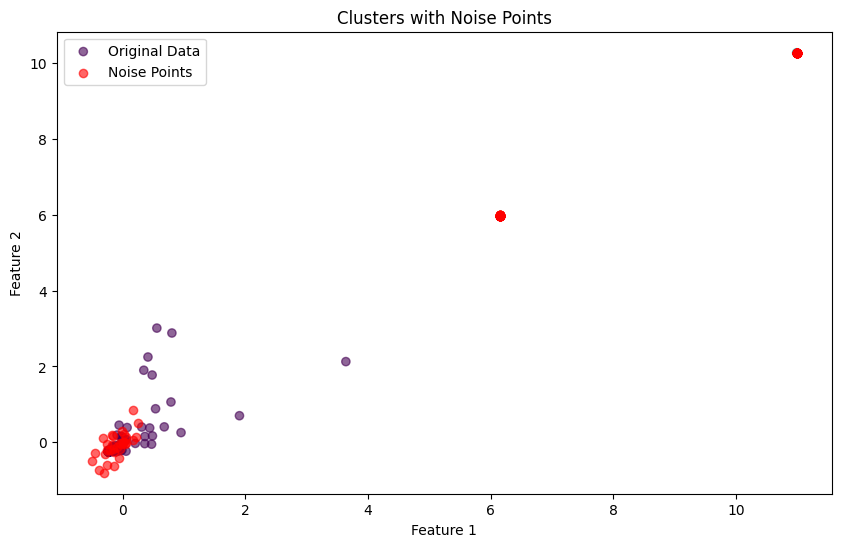

In [16]:
plt.figure(figsize=(10, 6))
plt.scatter(data_normalized[:, 0], data_normalized[:, 1], c=labels, cmap='viridis', alpha=0.6, label='Original Data')
plt.scatter(noise_points[:, 0], noise_points[:, 1], c='red', alpha=0.6, label='Noise Points')
plt.legend()
plt.title('Clusters with Noise Points')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()